<a href="https://colab.research.google.com/github/vikpy/DLSem3/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1. Which initialization is suitable for Monsoon dataset?

In [6]:
!pip install pyforest
from pyforest import * 

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13715 sha256=a5c964f0f57178fe5b94451030cec84726d3693af3887a8339b41840d0d1fd82
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# To be done later on
path_for_weather_data = '/content/drive/My Drive/dataset2'

# Q2. Model for cifar10 which gives 70-75% val_acc. (hyper-parameters)

In [1]:
import tensorflow as tf
from keras import models 
from keras.layers import Dense 
from keras.utils import to_categorical
from keras.datasets import cifar10
 

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [36]:
X_train[1:2]

array([[0.6039216 , 0.69411767, 0.73333335, ..., 0.56078434, 0.52156866,
        0.5647059 ]], dtype=float32)

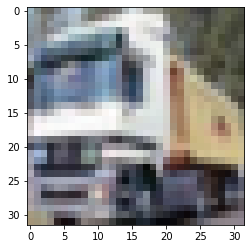

In [29]:
plt.imshow(X_train[1])

In [24]:
X_train.shape , X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [28]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [3]:
X_train = X_train.reshape((50000, 32*32*3))
X_test = X_test.reshape((10000, 32*32*3))
print(X_train.shape)
print(X_test.shape)
# Normalize 
X_train = X_train.astype('float32')/255
X_test =  X_test.astype('float32')/255

(50000, 3072)
(10000, 3072)


In [8]:
# Cateogorical to one hot encoded 
y_test = to_categorical(y_test, 10)
y_train = to_categorical(y_train, 10)

In [39]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [10]:
model = models.Sequential()
model.add(Dense(units=200, activation='relu', input_dim=3072)  )  # kernel_initializer="zeros", bias_initializer="zeros", 
model.add(Dense(units=200, activation='relu') ) # kernel_initializer="zeros", bias_initializer="zeros", 
model.add(Dense(units=10, activation='softmax') )   # kernel_initializer="zeros", bias_initializer="zeros", 
model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=100, batch_size = 32, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 97us/step - loss: 1.9081 - accuracy: 0.3181 - val_loss: 1.8001 - val_accuracy: 0.3570
Epoch 2/100
40000/40000 [==============================] - 4s 95us/step - loss: 1.7277 - accuracy: 0.3863 - val_loss: 1.6997 - val_accuracy: 0.3989
Epoch 3/100
40000/40000 [==============================] - 4s 95us/step - loss: 1.6489 - accuracy: 0.4156 - val_loss: 1.6603 - val_accuracy: 0.4097
Epoch 4/100
40000/40000 [==============================] - 4s 95us/step - loss: 1.5989 - accuracy: 0.4340 - val_loss: 1.6308 - val_accuracy: 0.4229
Epoch 5/100
40000/40000 [==============================] - 4s 95us/step - loss: 1.5565 - accuracy: 0.4484 - val_loss: 1.5872 - val_accuracy: 0.4469
Epoch 6/100
40000/40000 [==============================] - 4s 95us/step - loss: 1.5199 - accuracy: 0.4614 - val_loss: 1.5540 - val_accuracy: 0.4468
Epoch 7/100
40000/40000 [==============================] - 4s 

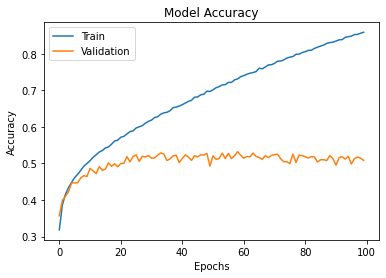

In [11]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="best")
plt.show()